In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def create_normal_sine(time_len):
    x = np.linspace(0, 2 * np.pi, 50)
    noise = np.random.normal(0,1, time_len)
    return 10*np.sin(np.tile(x, int(time_len/50))) + 0.6*noise
    

## Create Sinus Curve with Gausian Noise

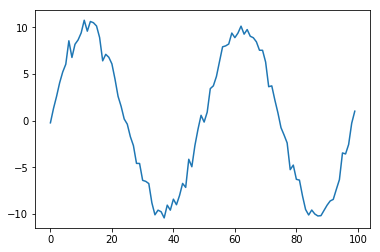

In [7]:
# Create Sine Wave
sinewave = create_normal_sine(2000)
time = range(len(sinewave))

# Plot Sine Wave
plt.plot(sinewave[100:200])
plt.show()

# Save Sine Wave as .csv
df = pd.DataFrame(data={"time":time, "value":sinewave})
df.to_csv("./sine_wave.csv", index=False, sep=";")

## Create Sinus Curve with several Errors
Errors will be:
- a higher level of noise
- an increase in sinusoidal amplitude
- a higher frequency
- a lower frequency
- an offset
- the interruption of the signal.

In [4]:
# Create Signal with errors
sine_with_error = []

# 0 - 249: no error
sine_with_error.append(create_normal_sine(250))

# 250 - 299: higher level of noise
x = np.linspace(0, 2 * np.pi, 50)
noise = np.random.normal(0,1, 50)
sine_with_error.append(10*np.sin(np.tile(x, 1)) + 3*noise)

# 300 - 449: no error
sine_with_error.append(create_normal_sine(150))

# 450 - 499: increase in amplitude
noise = np.random.normal(0,1, 50)
sine_with_error.append(14*np.sin(np.tile(x, 1)) + noise)

# 500 - 749: no error
sine_with_error.append(create_normal_sine(250))

# 750 - 849: higher frequency 
x = 1.3*np.linspace(0, 2 * np.pi, 50)
noise = np.random.normal(0,1, 100)
sine_with_error.append(10*np.sin(np.tile(x, 2)) + noise)

# 850 - 1149: no error
sine_with_error.append(create_normal_sine(300))

# 1150 - 1299: lower frequency 
x = 0.8*np.linspace(0, 2 * np.pi, 50)
noise = np.random.normal(0,1, 150)
sine_with_error.append(10*np.sin(np.tile(x, 3)) + noise)

# 1300 - 1499: no error
sine_with_error.append(create_normal_sine(200))

# 1500 - 1649: offset
x = np.linspace(0, 2 * np.pi, 50)
noise = np.random.normal(0,1, 150)
sine_with_error.append(10*np.sin(np.tile(x, 3)) + noise + 5)

# 1650 - 1699: no error
sine_with_error.append(create_normal_sine(50))

# 1700 - 1799: no signal
sine_with_error.append(np.zeros(100))

# 1800 - 1999: no error
sine_with_error.append(create_normal_sine(200))

# Concatenate intervals to one signal 
signal = []
# Plot Sine Wave
for i in sine_with_error:
    signal = np.concatenate((signal, i), axis=None)
print(len(signal))
# Save Sine Wave as .csv
df = pd.DataFrame(data={"time":time, "value":signal})
df.to_csv("./sine_wave_errors.csv", index=False, sep=";")

2000


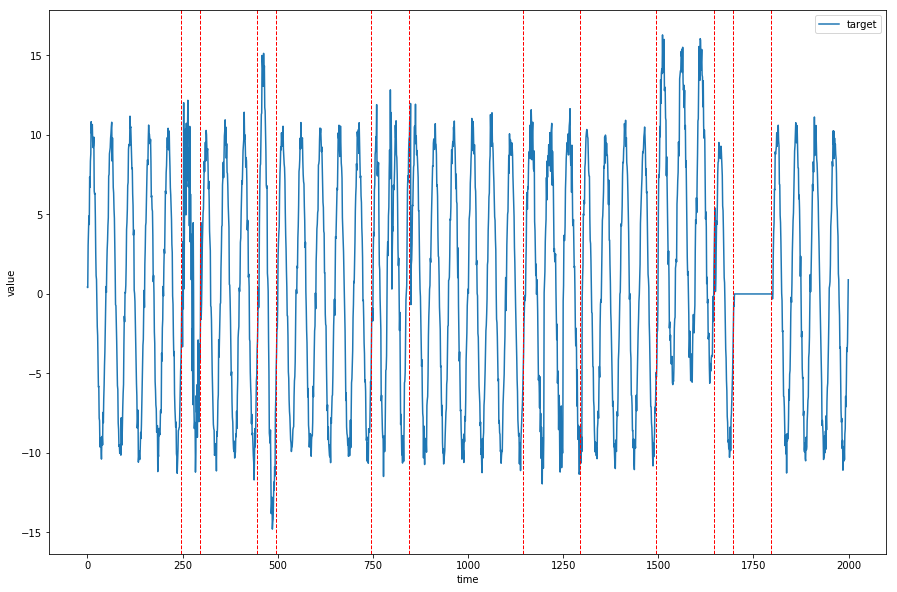

In [5]:
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(data=df, x="time", y="value", label="target")
plt.axvline(245, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(295, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(445, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(495, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(745, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(845, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(1145, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(1295, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(1495, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(1645, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(1695, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(1795, 0,2, color="r", linestyle ="--", linewidth=1)
plt.show()

In [8]:
original = pd.read_csv("../vega_shrinkwrapper_original/NewBlade/NewBlade001_short.csv", header=0)
sine = pd.read_csv("./sine_wave.csv", header=0, sep=";")
original["sine"]= sine["value"]

original.to_csv("../../data/artifical_signals/NewBlade_with_sine.csv", index=False)